# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [36]:
!./download.sh

--2017-01-06 11:09:25--  https://d17h27t6h515a5.cloudfront.net/topher/2016/November/581faac4_traffic-signs-data/traffic-signs-data.zip
Resolving d17h27t6h515a5.cloudfront.net (d17h27t6h515a5.cloudfront.net)... 52.84.246.133, 52.84.246.151, 52.84.246.172, ...
Connecting to d17h27t6h515a5.cloudfront.net (d17h27t6h515a5.cloudfront.net)|52.84.246.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 120740327 (115M) [application/zip]
Saving to: 'traffic-signs-data.zip.1'

traffic-signs-data. 100%[===================>] 115.15M  49.1MB/s    in 2.3s    

2017-01-06 11:09:28 (49.1 MB/s) - 'traffic-signs-data.zip.1' saved [120740327/120740327]

Archive:  traffic-signs-data.zip
replace test.p? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [33]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [34]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(y_train)

# TODO: Number of testing examples.
n_test = len(y_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [35]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

In [36]:
import pandas as pd
signnames = pd.read_csv('signnames.csv')

In [37]:
def get_meaningful_class_name(class_id):
    return signnames[signnames['ClassId'] == class_id]['SignName'].iloc[0]

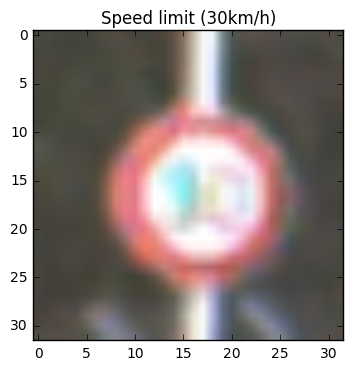

In [38]:
# Show one of the images
i = 1231
image = X_train[i]
plt.title(get_meaningful_class_name(y_train[i]))
plt.imshow(image)

In [39]:
import numpy as np
def plot_distribution(labels):
    plt.bar(np.unique(labels), np.bincount(labels))
    plt.show()

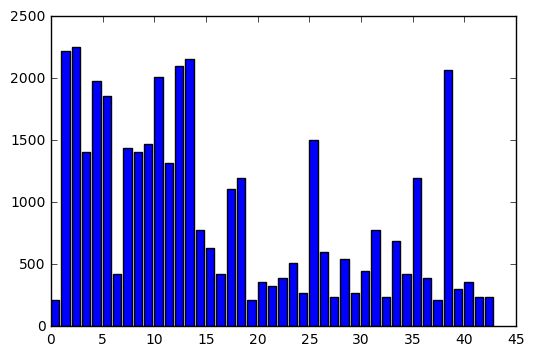

In [40]:
plot_distribution(y_train)

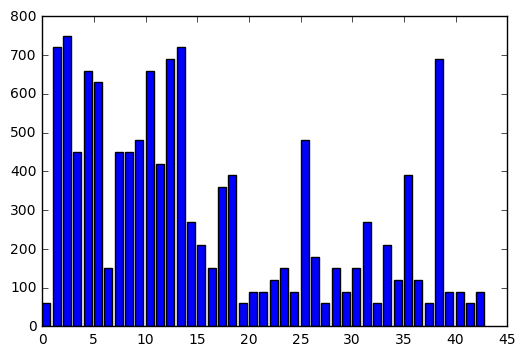

In [41]:
plot_distribution(y_test)

The dataset does not have enough data for some classes, as seen from the plot above.

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [42]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

# Normalization
X_train = X_train/255.0
X_test = X_test/255.0

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?

**Answer:**  
* Normalization helps with gradient descent convergence, because the step is not jumping that much when using [0, 1] vs [0, 255]. Interestingly enough, when I first tried normalization, the accuracy on the validation set appeared to be very steadily increased, compared to constant ups and downs without normalization. I read the explanation from here: https://carnd-forums.udacity.com/questions/18449736/normalization-range-in-tensorflow-lab
* I tried converting to grayscale, but that did no seem to improve the results using my architecture
* I also tried converting to another HSV, but it did not help much
* Note the first layer in my architecture below. It is 1x1 convolution with depth 3, which allows the model to "learn" its own color space. I took this idea from this paper: https://arxiv.org/abs/1606.02228

Based on the arguments above, I chose to only normalize the images.

In [53]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

In [55]:
# Let's install imutils package to help us generate fake data
!pip install imutils

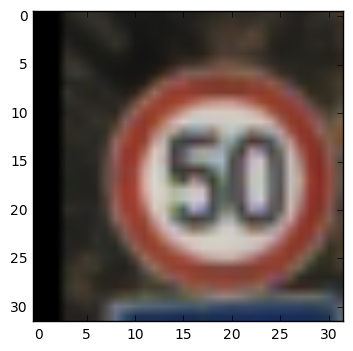

In [56]:
# Let's quickly check out what the additional data will look like
# Note: the actual fake data is not generated here, it is generated during training
import imutils
plt.imshow(X_train[0])
slightly_translated = imutils.translate(X_train[0], 3, 0)
plt.imshow(slightly_translated)

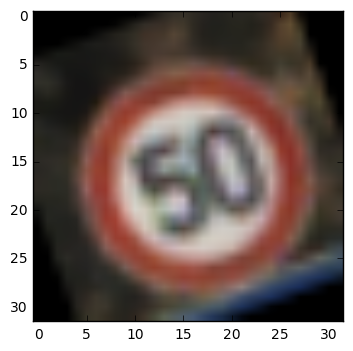

In [57]:
import imutils
slightly_rotated = imutils.rotate(X_train[0], angle=20)
plt.imshow(slightly_rotated)

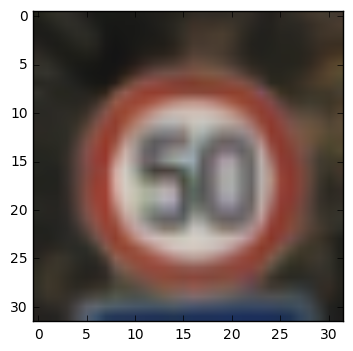

In [58]:
import imutils
slightly_scaled = imutils.resize(X_train[0], width=28)
slightly_scaled = imutils.resize(slightly_scaled, width=32)
plt.imshow(slightly_scaled)

In [59]:
# This function, as well as the two after this one, are going to generate additional data
# on the fly while training. They take a batch as a parameter and return the same batch
# with applied transorfmation similar to the above cells - rotation, translation, scaling.
def get_rotated(X_train, y_train, rotation_angle=5):
    X_train_rotated = np.zeros_like(X_train)
    for i in range(len(X_train)):
        X_train_rotated[i] = imutils.rotate(X_train[i], rotation_angle)
    return X_train_rotated, y_train

In [49]:
def get_translated(X_train, y_train, dx=3, dy=0):
    X_train_translated = np.zeros_like(X_train)
    for i in range(len(X_train)):
        X_train_translated[i] = imutils.translate(X_train[i], dx, dy)
    return X_train_translated, y_train

In [50]:
def get_scaled(X_train, y_train, width=29):
    X_train_scaled = np.zeros_like(X_train)
    for i in range(len(X_train)):
        temp = imutils.resize(X_train[i], width)
        X_train_scaled[i] = imutils.resize(temp, 32)
    return X_train_scaled, y_train

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.33, random_state=42)

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

* I created a validation set by splitting the training set. The validation set is 33% of the training set.
* I created three functions which generate translated, rotated or scaled version of a given batch. I will use them to generate additional data on the fly while training.
* The generating of additional data is very important, because some classes have a lot less examples than others
* The generated data is different from the original data in that it is translated, rotated or scaled

In [52]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
from tensorflow.contrib.layers import flatten

def Model(x, dropout_prob):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # Convolutional 32x32x3 -> 32x32x3
    conv0_W = tf.Variable(tf.truncated_normal(shape=(1, 1, 3, 3), mean = mu, stddev = sigma))
    conv0_b = tf.Variable(tf.zeros(3))
    conv0   = tf.nn.conv2d(x, conv0_W, strides=[1, 1, 1, 1], padding='VALID') + conv0_b

    # Relu Activation.
    conv0 = tf.nn.relu(conv0)
    print('Conv0 {}'.format(conv0.get_shape()))
    
    # Convolutional 32x32x3 -> 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(conv0, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Relu Activation.
    conv1 = tf.nn.relu(conv1)
    print('Conv1 {}'.format(conv1.get_shape()))

    conv1 = tf.nn.dropout(conv1, dropout_prob)
    
    # Convolutional 28x28x6 -> 24x24x6
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 6), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(6))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') #+ conv2_b
    
    # Relu Activation.
    conv2 = tf.nn.relu(conv2)
    print('Conv2 {}'.format(conv2.get_shape()))
    
    conv2 = tf.nn.dropout(conv2, dropout_prob)

    
    # Convolutional 24x24x6 -> 20x20x6
    conv3_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 6), mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros(6))
    conv3   = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='VALID') + conv3_b
    
    # Relu Activation.
    conv3 = tf.nn.relu(conv3)
    print('Conv3 {}'.format(conv3.get_shape()))
    
    conv3 = tf.nn.dropout(conv3, dropout_prob)
    
    # Convolutional 20x20x6 -> 16x16x6
    conv4_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 6), mean = mu, stddev = sigma))
    conv4_b = tf.Variable(tf.zeros(6))
    conv4 = tf.nn.conv2d(conv3, conv4_W, strides=[1, 1, 1, 1], padding='VALID') + conv4_b
    
    # Relu Activation
    conv4 = tf.nn.relu(conv4)
    print('Conv4 {}'.format(conv3.get_shape()))
    
    # Convolutional 16x16x6 -> 12x12x6
    conv5_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 6), mean = mu, stddev = sigma))
    conv5_b = tf.Variable(tf.zeros(6))
    conv5 = tf.nn.conv2d(conv4, conv5_W, strides=[1, 1, 1, 1], padding='VALID') + conv5_b
    
    # Relu Activation
    conv5 = tf.nn.relu(conv5)
    print('Conv5 {}'.format(conv5.get_shape()))
    
    # Convolutional 12x12x6 -> 8x8x6
    conv6_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 6), mean = mu, stddev = sigma))
    conv6_b = tf.Variable(tf.zeros(6))
    conv6 = tf.nn.conv2d(conv5, conv6_W, strides=[1, 1, 1, 1], padding='VALID') + conv6_b
    
    # Relu Activation
    conv6 = tf.nn.relu(conv6)
    print('Conv6 {}'.format(conv6.get_shape()))
    
    # Convolutional 8x8x6 -> 5x5x6
    conv7_W = tf.Variable(tf.truncated_normal(shape=(4, 4, 6, 6), mean = mu, stddev = sigma))
    conv7_b = tf.Variable(tf.zeros(6))
    conv7 = tf.nn.conv2d(conv6, conv7_W, strides=[1, 1, 1, 1], padding='VALID') + conv7_b
    
    # Relu Activation
    conv7 = tf.nn.relu(conv7)

    print('Conv7 {}'.format(conv7.get_shape()))

    # Flatten 5x5x6 -> 150.
    fc0   = flatten(conv7)
    print('Fully connected 0: {}'.format(fc0.get_shape()))
    
    # Fully connected 150 -> 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(150, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Relu Activation.
    fc1    = tf.nn.relu(fc1)
    
    print('Fully connected 1: {}'.format(fc1.get_shape()))

    # Fully connected 120 -> 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Relu Activation.
    fc2    = tf.nn.relu(fc2)
    
    print('Fully connected 2: {}'.format(fc2.get_shape()))

    # Fully Connected 84 -> 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

The architecture starts with a 1x1 convolution, which has the purpose to find a suitable custom color space in which to evaluate the image. Then I am using series of convolutional layers without pooling with dropout on the layers that represent the high level feature, then followed by fully connected layers. The idea is that with this incremental approach I can capture features on different levels. A downside is that there are a lot of parameters to fine. The fully connected part is the same as in LeNet.

Architecture:
* Convolutional layer #0 32x32x3 -> 32x32x32 with relu activation
* Convolutional layer #1 32x32x3 -> 28x28x6 with relu activation
* Dropout - keep 80%
* Convolutional layer #2 28x28x6 -> 24x24x6 with relu activation
* Dropout - keep 80%
* Convolutional layer #3 24x24x6 -> 20x20x6 with relu activation
* Dropout - keep 80%
* Convolutional layer #4 20x20x6 -> 16x16x6 with relu activation
* Convolutional layer #5 16x16x6 -> 12x12x6 with relu activation
* Convolutional layer #6 12x12x6 -> 8x8x6 with relu activation
* Convolutional layer #7 8x8x6 -> 5x5x6 with relu activation
* Flatten layer 5x5x6 -> 150
* Fully connected layer #1 150 -> 120 with relu activation
* Fully connected layer #2 120 -> 84 with relu activation
* Fully connected layer #3 84 -> 43 

In [57]:
### Train your model here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
x = tf.placeholder(tf.float32, (None, 32, 32, 3), name="x")
y = tf.placeholder(tf.int32, (None), name="y")
one_hot_y = tf.one_hot(y, 43)
dropout_prob = tf.placeholder(tf.float32, (), name="dropout_prob")

In [58]:
rate = 0.001

logits = Model(x, dropout_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

Conv0 (?, 32, 32, 3)
Conv1 (?, 28, 28, 6)
Conv2 (?, 24, 24, 6)
Conv3 (?, 20, 20, 6)
Conv4 (?, 20, 20, 6)
Conv5 (?, 12, 12, 6)
Conv6 (?, 8, 8, 6)
Conv7 (?, 5, 5, 6)
Fully connected 0: (?, 150)
Fully connected 1: (?, 120)
Fully connected 2: (?, 84)


In [59]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(X_data, y_data, sess):
    num_examples = len(X_data)
    total_accuracy = 0
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, dropout_prob:1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [60]:
EPOCHS = 25
BATCH_SIZE = 64

In [61]:
tf.add_to_collection('inputs', x)
tf.add_to_collection('inputs', y)
tf.add_to_collection('inputs', one_hot_y)
tf.add_to_collection('inputs', dropout_prob)
tf.add_to_collection('outputs', logits)
tf.add_to_collection('outputs', correct_prediction)
tf.add_to_collection('outputs', accuracy_operation)

In [33]:
from sklearn.utils import shuffle
import tensorflow as tf
import time
start_session = time.time()
with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    best_validation_accuracy = 0
    for i in range(EPOCHS):
        start_epoch = time.time()
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            dropout_prob_training = 0.8
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, dropout_prob:dropout_prob_training})
            
            for k in range(2):
                rescaled_x, rescaled_y = get_scaled(batch_x, batch_y, 32 - (k*2+1))
                sess.run(training_operation, feed_dict={x: rescaled_x, y:rescaled_y, 
                                                        dropout_prob:dropout_prob_training})
            for k in range(-1, 2):
                translated_x, translated_y = get_translated(batch_x, batch_y, k*2)
                sess.run(training_operation, feed_dict={x: translated_x, y: translated_y, 
                                                        dropout_prob: dropout_prob_training})
                
            for k in range(-1, 2):
                translated_x, translated_y = get_translated(batch_x, batch_y, 0, k*2)
                sess.run(training_operation, feed_dict={x: translated_x, y: translated_y,
                                                       dropout_prob: dropout_prob_training})
            
            for l in range(-1, 2):
                rotated_x, rotated_y = get_rotated(batch_x, batch_y, l*2)
                sess.run(training_operation, feed_dict={x: rotated_x, y: rotated_y,
                                                       dropout_prob: dropout_prob_training})
            
        validation_accuracy = evaluate(X_validation, y_validation, sess)
        if validation_accuracy > best_validation_accuracy:
            best_validation_accuracy = validation_accuracy
            try:
                saver
            except NameError:
                saver = tf.train.Saver()
            saver.save(sess, 'model')
            print("Model saved, since it improved validation accuracy")
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print("Time for epoch: {}".format(time.time() - start_epoch))
        print()
        
    test_accuracy = evaluate(X_test, y_test, sess)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

    
print("Time for all session: {}".format(time.time() - start_session))

Instructions for updating:
Use `tf.global_variables_initializer` instead.
Training...

Model saved, since it improved validation accuracy
EPOCH 1 ...
Validation Accuracy = 0.814
Time for epoch: 118.96843910217285

Model saved, since it improved validation accuracy
EPOCH 2 ...
Validation Accuracy = 0.917
Time for epoch: 118.17235946655273

Model saved, since it improved validation accuracy
EPOCH 3 ...
Validation Accuracy = 0.954
Time for epoch: 118.12258744239807

Model saved, since it improved validation accuracy
EPOCH 4 ...
Validation Accuracy = 0.964
Time for epoch: 117.98385858535767

EPOCH 5 ...
Validation Accuracy = 0.960
Time for epoch: 116.99565196037292

Model saved, since it improved validation accuracy
EPOCH 6 ...
Validation Accuracy = 0.969
Time for epoch: 117.87719583511353

Model saved, since it improved validation accuracy
EPOCH 7 ...
Validation Accuracy = 0.969
Time for epoch: 117.47521448135376

Model saved, since it improved validation accuracy
EPOCH 8 ...
Validation A

In [65]:
# Let's evaluate the best model on the test data
with tf.Graph().as_default() as g:
    with tf.Session() as sess:
        loader = tf.train.import_meta_graph('model.meta')
        x, y, one_hot, dropout_prob= tf.get_collection('inputs')[:4]
        logits, correct_prediction, accuracy_operation = tf.get_collection('outputs')[:3]
        loader.restore(sess, tf.train.latest_checkpoint('./'))
        test_accuracy = evaluate(X_test, y_test, sess)
        print("Test Accuracy of best model on test = {:.3f}".format(test_accuracy))

Test Accuracy of best model on validation = 0.949


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

* Optimizer - Adam with learning rate 0.001
* Batch size - 64
* Epochs - 25
* Loss function - softmax categorical log loss

During training, I saved the models that performed best on the validation set. For each batch, I generated additional data:

* Scaled data - the same picture but with some quality lost
* Slightly translated +2, or -2 on the x axis
* Slightly translated +2, or -2 on the y axis
* Slightly rotated +2 or -2 degrees.

Generating more additional data is something that I believe could improve even further the model's performance. For example, more rotated versions, more translated, more scaled, combinations of these, etc.

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

1. First I ran the LeNet architecture with slight modifications from the lesson. It achieved high accuracy on the validation dataset and 91% on the test dataset. This is the baseline.
2. I then tried normalization, and this lead to slight rise to the accuracy on the test set, but most importantly, it appeared to be more stable and predictable. Possible explanation is that with normalizing, instead of having a broad range of values on which the optimization step is done, the step is narrowed to a smaller interval.
3. I then tried a series of 7 convolutional layers followed by the same fully connected layers as in LeNet. The idea was to create a hierarchy of features on every level, without any "quick jumps" as poolings do. However, this really lowered the accuracy at first. I guess this is because there are a lot more parameters to be trained, and there was not enough data for some classes.
4. Then I created image augmentation functions, which generated additional data - slightly rotated and slightly translated images. I used them to generate data on the fly for every batch. It really lifted the performance on the validation set, and on the test set, the accuracy increased to 93%.
5. Trying to fight the overfitting to the training data, I added dropout keeping 80% to the Conv6 and Conv5 layers, but the results were similar to before. It also took more epochs. I then added dropout to Conv3 and Conv4 as well, and trained on more epochs. It did not improve the test accuracy much. I guess it underfits.
6. I then moved the dropout to the first three convolutional layers. It also did not change the test accuracy much.
7. I then added a 1x1 convolutional layer at the beginning, as recommended here: https://arxiv.org/abs/1606.02228 This significantly lifted the performance to 94.9% on the test set.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [66]:
!pip install pillow

In [63]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
from PIL import Image

def load_image(path):
    temp = Image.open(path)
    temp = temp.resize((32, 32), Image.ANTIALIAS)
    temp = np.array(temp)
    return temp
    
number_of_examples = 10
X_new = np.zeros((number_of_examples, 32, 32, 3))
y_new = np.zeros((number_of_examples))

X_new[0] = load_image('dangerous_turn_to_left.jpg')
y_new[0] = 19

X_new[1] = load_image('speed-limit-80.jpg')
y_new[1] = 5

X_new[2] = load_image('speed-limit-20.jpg')
y_new[2] = 0

X_new[3] = load_image('stop.jpg')
y_new[3] = 14

X_new[4] = load_image('wild_animals_crossing.jpg')
y_new[4] = 31

X_new[5] = load_image('ahead_only.jpg')
y_new[5] = 35

X_new[6] = load_image('traffic_signals.jpg')
y_new[6] = 26

X_new[7] = load_image('road_work.jpg')
y_new[7] = 25

X_new[8] = load_image('priority_road.jpg')
y_new[8] = 12

X_new[9] = load_image('no_entry.jpg')
y_new[9] = 17

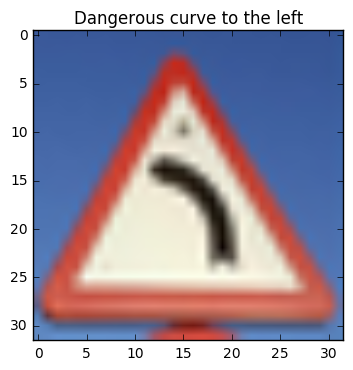

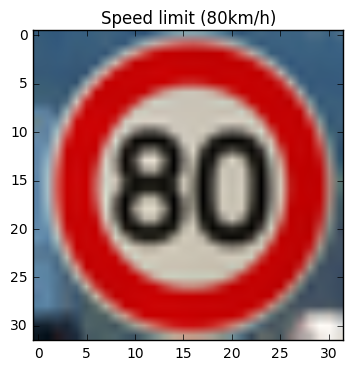

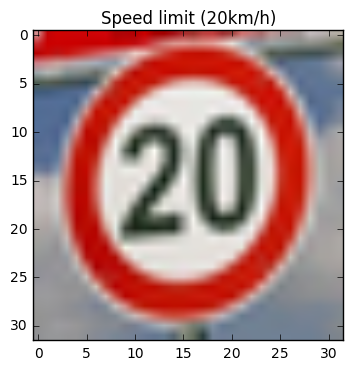

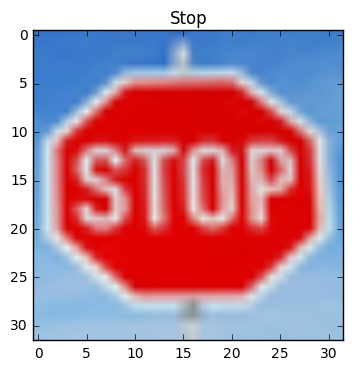

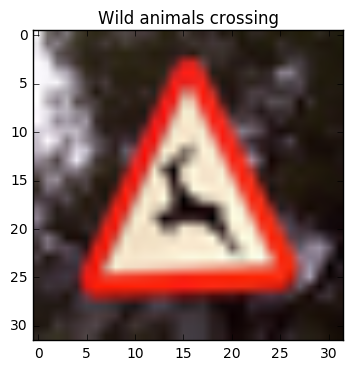

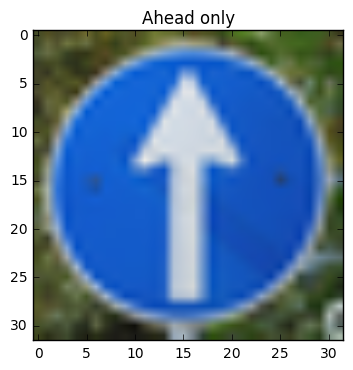

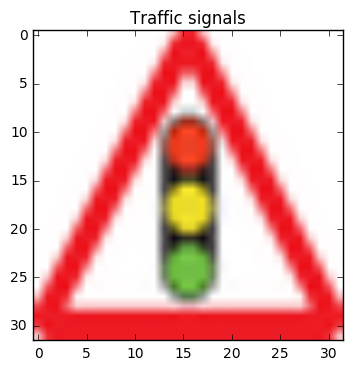

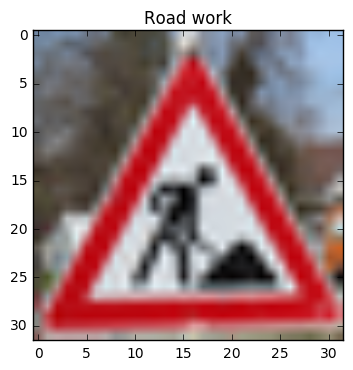

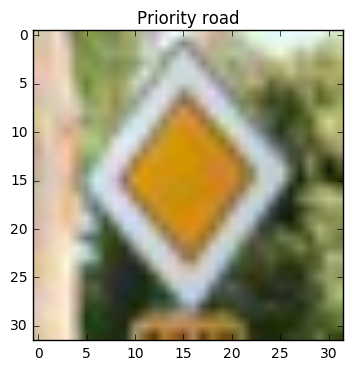

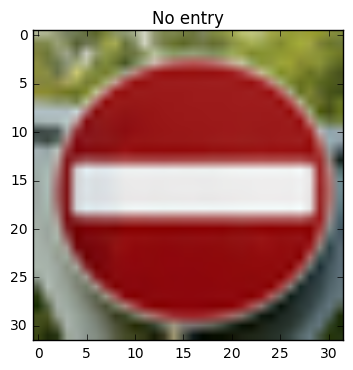

In [70]:
for i in range(len(X_new)):
    plt.figure()
    plt.title(get_meaningful_class_name(y_new[i]))
    plt.imshow(X_new[i])

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

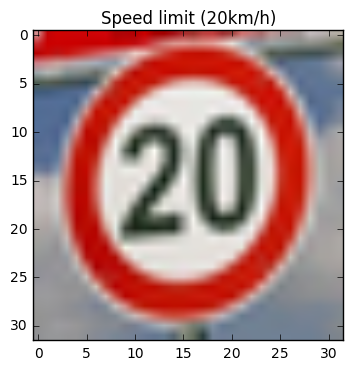

In [69]:
# The different speed limit signs look alike, so it is interestring how confident the model is when classifying
# those.
plt.title(get_meaningful_class_name(y_new[2]))
plt.imshow(X_new[2])

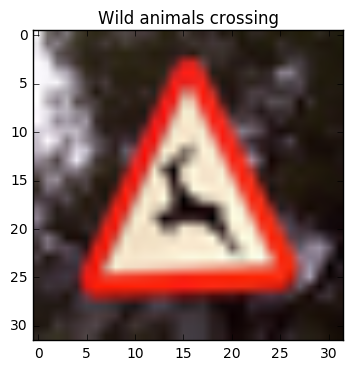

In [72]:
# This is an image which belongs to class 31, for which we have very few examples,
# as seen in the visualizations in the beginning. It also is visually similar to dangerous curve to the left
plt.title(get_meaningful_class_name(y_new[4]))
plt.imshow(X_new[4])

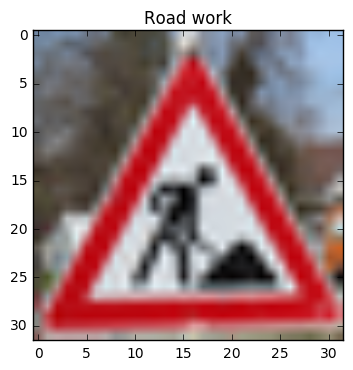

In [73]:
# Road work sign is visually similar to dangerous curve to the right
plt.title(get_meaningful_class_name(y_new[7]))
plt.imshow(X_new[7])

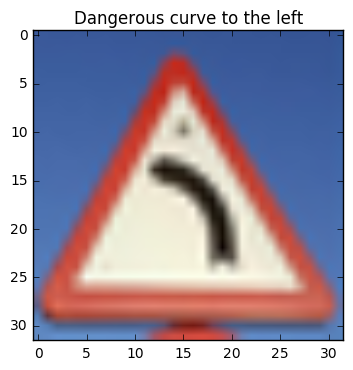

In [74]:
plt.title(get_meaningful_class_name(y_new[0]))
plt.imshow(X_new[0])

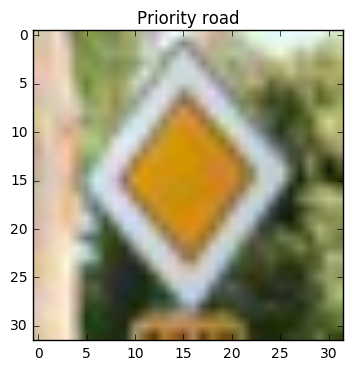

In [76]:
# The background of this one is very noisy
plt.title(get_meaningful_class_name(y_new[8]))
plt.imshow(X_new[8])

In [70]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

with tf.Graph().as_default() as g:
    with tf.Session() as sess:
        loader = tf.train.import_meta_graph('model.meta')
        x, y, one_hot, dropout_prob= tf.get_collection('inputs')[:4]
        logits, correct_prediction, accuracy_operation = tf.get_collection('outputs')[:3]
        loader.restore(sess, tf.train.latest_checkpoint('./'))
#         test_accuracy = evaluate(X_new, y_new, sess)
        top_5 = tf.nn.top_k(tf.nn.softmax(logits), 5)
        
        results = sess.run(top_5, feed_dict={x: X_new, y: y_new, dropout_prob: 1.0})
        top_5_predictions = results.values
        top_5_indices = results.indices
        
        
        for i in range(len(top_5_predictions)):
            print('Example {i} -> {actual}'.format(i=i, actual=get_meaningful_class_name(y_new[i])))
            for j in range(5):
                traffic_sign = get_meaningful_class_name(top_5_indices[i][j])
                probability = top_5_predictions[i][j]
                print("Class {traffic_sign} -> {probability}".format(traffic_sign=traffic_sign, 
                                                                     probability=probability))
            print()

Example 0 -> Dangerous curve to the left
Class Dangerous curve to the left -> 0.999998927116394
Class Double curve -> 7.543644073848554e-07
Class Road narrows on the right -> 2.1271029027047916e-07
Class Speed limit (70km/h) -> 9.035738912643865e-08
Class Slippery road -> 4.04802911191382e-08

Example 1 -> Speed limit (80km/h)
Class Speed limit (80km/h) -> 0.9999966621398926
Class Speed limit (30km/h) -> 3.3196770345966797e-06
Class Wild animals crossing -> 1.1064813065786439e-08
Class Speed limit (50km/h) -> 6.3919736170703345e-09
Class Speed limit (100km/h) -> 5.0430699616299535e-09

Example 2 -> Speed limit (20km/h)
Class Speed limit (20km/h) -> 0.6862905621528625
Class Speed limit (30km/h) -> 0.31339675188064575
Class Speed limit (70km/h) -> 0.00031184402178041637
Class Speed limit (120km/h) -> 6.476385010500962e-07
Class Speed limit (50km/h) -> 3.381224189524801e-08

Example 3 -> Stop
Class Stop -> 0.9999986886978149
Class No entry -> 1.2822405324186548e-06
Class Yield -> 1.192544

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


In [64]:
# Do the same preprocessing as the training
X_new /= 255.0

In [69]:
import tensorflow as tf
with tf.Graph().as_default() as g:
    with tf.Session() as sess:
        loader = tf.train.import_meta_graph('model.meta')
        x,y, one_hot, dropout_prob= tf.get_collection('inputs')[:4]
        logits, correct_prediction, accuracy_operation = tf.get_collection('outputs')[:3]
        loader.restore(sess, tf.train.latest_checkpoint('./'))
        test_accuracy = evaluate(X_new, y_new, sess)
        print("Accuracy = {:.3f}".format(test_accuracy))

Accuracy = 0.800


**Answer:**

The model correctly classifies 8/10 new images from the internet. It makes mistake on the "Road work" sign, thinking it is a "Dangerous turn to the right", but the correct class "Road work" is his second suggestion. 

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

# See the cell with predictions, there I already showed the top 5 softmax predictions

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

* The model is very confident in most of its predictions. 
* Out of the 10 new images, he makes mistake on two of them - the "traffic signals" and "road work". 
* It is worth noting that even though he classified the "road work" traffic sign mistakenly, it is his second suggestion.
* Same is true for "traffic signals", although there the model is extremely confident that what he is seeing is "general caution". It also makes sense to make mistake on this one, because general caution has a dot from its exclamation mark and is thus similar visually to "traffic signals".
* An example of an image where the model is not very confident is the "Speed limit 20 km/h" image. The prediction says 0.68 probability that it is "Speed limit 20 km/h" and 0.31 that it is "Speed limit 30 km/h". It is understandable that the model is not fully certain here, because these two classes look similar, especially in such low resolution.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.